In [1]:
# this mounts your Google Drive to the Colab VM.
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'CV7062610/assignments/assignment3/'
FOLDERNAME = "assignment3/"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
#import sys
#sys.path.append('/workspaces/Computer-vision-and-AI-ex-3/assignment3')

# this downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
#%cd drive/My\ Drive/$FOLDERNAME/CV7062610/datasets/
#%cd CV7062610/datasets/
#!bash get_datasets.sh
#!bash get_datasets.sh
#%cd /content
#%cd /workspaces/Computer-vision-and-AI-ex-3/assignment3

In [2]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from CV7062610.classifiers.fc_net import *
from CV7062610.data_utils import get_CIFAR10_data
from CV7062610.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from CV7062610.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

=========== You can safely ignore the message below if you are NOT working on ConvolutionalNetworks.ipynb ===========
	You will need to compile a Cython extension for a portion of this assignment.
	The instructions to do this will be given in a section of the notebook below.
	There will be an option for Colab users and another for Jupyter (local) users.


In [3]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


# Update rules
So far we have used vanilla stochastic gradient descent (SGD) as our update rule. More sophisticated update rules can make it easier to train deep networks. We will implement a few of the most commonly used update rules and compare them to vanilla SGD.

# SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent. See the Momentum Update section at http://cs231n.github.io/neural-networks-3/#sgd for more information.

Open the file `CV7062610/optim.py` and read the documentation at the top of the file to make sure you understand the API. Implement the SGD+momentum update rule in the function `sgd_momentum` and run the following to check your implementation. You should see errors less than e-8.

In [4]:
from CV7062610.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

# Should see relative errors around e-8 or less
print('next_w error: ', rel_error(next_w, expected_next_w))
print('velocity error: ', rel_error(expected_velocity, config['velocity']))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


Once you have done so, run the following to train a six-layer network with both SGD and SGD+momentum. You should see the SGD+momentum update rule converge faster.

running with  sgd
(Iteration 1 / 200) loss: 2.807325
(Epoch 0 / 5) train acc: 0.107000; val_acc: 0.091000
(Iteration 11 / 200) loss: 2.315234
(Iteration 21 / 200) loss: 2.252957
(Iteration 31 / 200) loss: 2.156942
(Epoch 1 / 5) train acc: 0.225000; val_acc: 0.205000
(Iteration 41 / 200) loss: 2.144405
(Iteration 51 / 200) loss: 2.041842
(Iteration 61 / 200) loss: 2.081606
(Iteration 71 / 200) loss: 2.113644
(Epoch 2 / 5) train acc: 0.276000; val_acc: 0.253000
(Iteration 81 / 200) loss: 2.064095
(Iteration 91 / 200) loss: 1.986653
(Iteration 101 / 200) loss: 1.968047
(Iteration 111 / 200) loss: 1.945701
(Epoch 3 / 5) train acc: 0.313000; val_acc: 0.271000
(Iteration 121 / 200) loss: 2.001267
(Iteration 131 / 200) loss: 1.906157
(Iteration 141 / 200) loss: 1.966199
(Iteration 151 / 200) loss: 1.752433
(Epoch 4 / 5) train acc: 0.326000; val_acc: 0.282000
(Iteration 161 / 200) loss: 1.968200
(Iteration 171 / 200) loss: 1.946217
(Iteration 181 / 200) loss: 1.918763
(Iteration 191 / 200) los

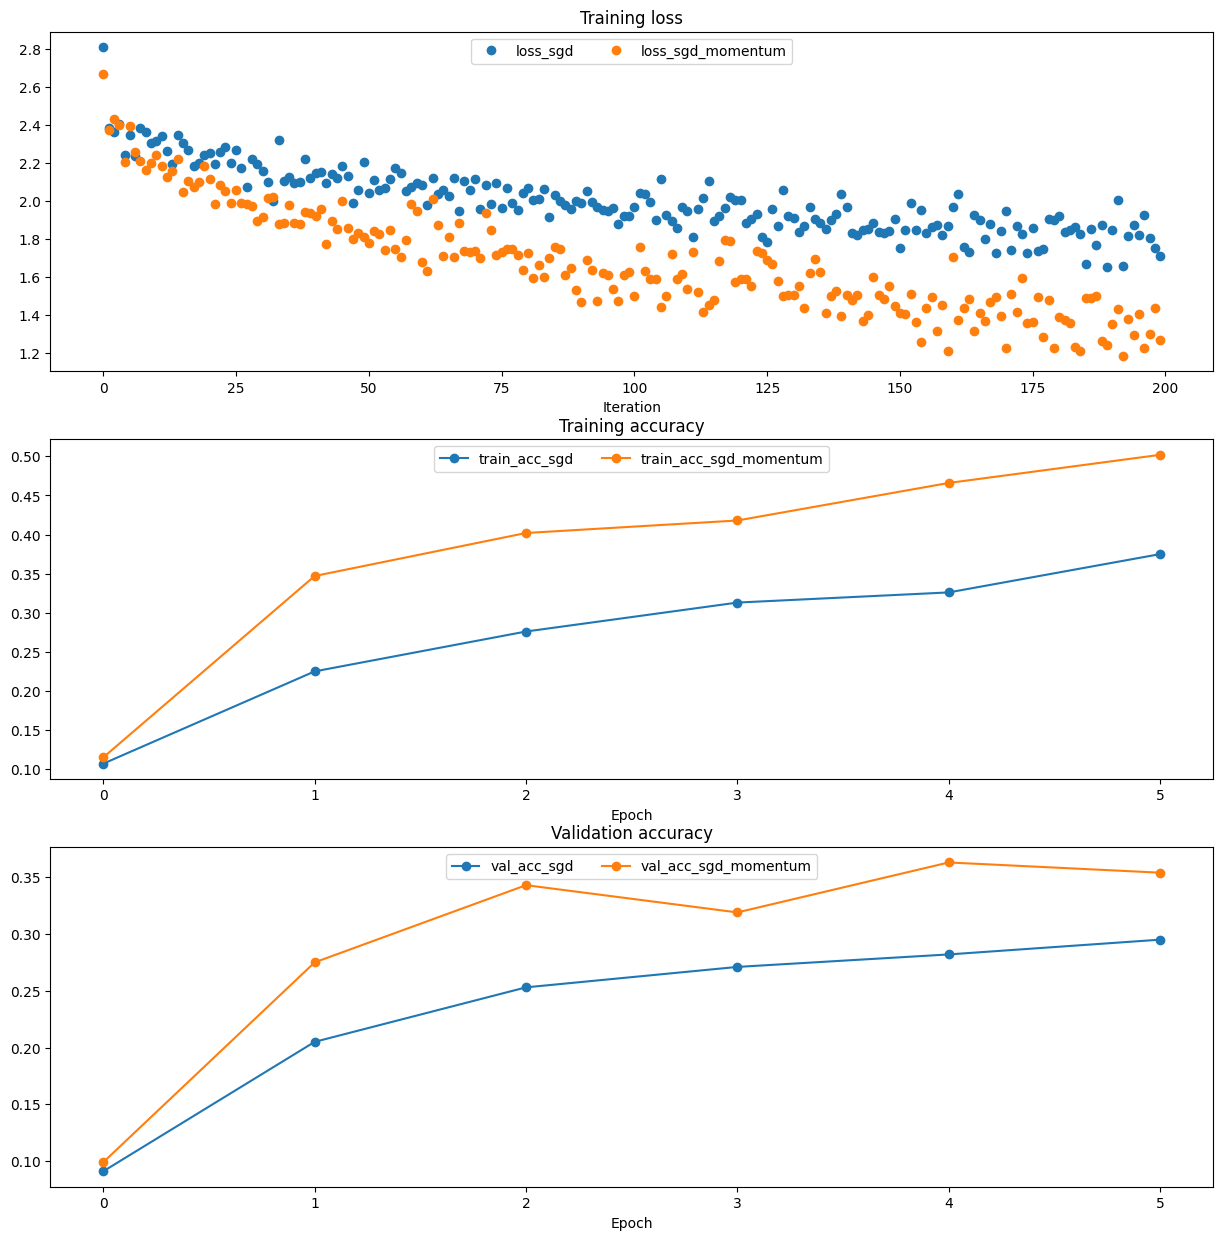

In [5]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 5e-3,
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label="loss_%s" % update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label="train_acc_%s" % update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label="val_acc_%s" % update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# RMSProp and Adam
RMSProp [1] and Adam [2] are update rules that set per-parameter learning rates by using a running average of the second moments of gradients.

In the file `CV7062610/optim.py`, implement the RMSProp update rule in the `rmsprop` function and implement the Adam update rule in the `adam` function, and check your implementations using the tests below.

**NOTE:** Please implement the _complete_ Adam update rule (with the bias correction mechanism), not the first simplified version mentioned in the course notes. 

[1] Tijmen Tieleman and Geoffrey Hinton. "Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent magnitude." COURSERA: Neural Networks for Machine Learning 4 (2012).

[2] Diederik Kingma and Jimmy Ba, "Adam: A Method for Stochastic Optimization", ICLR 2015.

In [6]:
# Test RMSProp implementation
from CV7062610.optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

# You should see relative errors around e-7 or less
print('next_w error: ', rel_error(expected_next_w, next_w))
print('cache error: ', rel_error(expected_cache, config['cache']))

next_w error:  9.524687511038133e-08
cache error:  2.6477955807156126e-09


In [7]:
# Test Adam implementation
from CV7062610.optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

# You should see relative errors around e-7 or less
print('next_w error: ', rel_error(expected_next_w, next_w))
print('v error: ', rel_error(expected_v, config['v']))
print('m error: ', rel_error(expected_m, config['m']))

next_w error:  1.1395691798535431e-07
v error:  4.208314038113071e-09
m error:  4.214963193114416e-09


Once you have debugged your RMSProp and Adam implementations, run the following to train a pair of deep networks using these new update rules:

running with  adam
(Iteration 1 / 200) loss: 2.636873
(Epoch 0 / 5) train acc: 0.150000; val_acc: 0.170000
(Iteration 11 / 200) loss: 2.049603
(Iteration 21 / 200) loss: 1.961302
(Iteration 31 / 200) loss: 1.750995
(Epoch 1 / 5) train acc: 0.387000; val_acc: 0.328000
(Iteration 41 / 200) loss: 1.832372
(Iteration 51 / 200) loss: 1.715998
(Iteration 61 / 200) loss: 1.647475
(Iteration 71 / 200) loss: 1.829289
(Epoch 2 / 5) train acc: 0.472000; val_acc: 0.350000
(Iteration 81 / 200) loss: 1.503870
(Iteration 91 / 200) loss: 1.575994
(Iteration 101 / 200) loss: 1.609144
(Iteration 111 / 200) loss: 1.465539
(Epoch 3 / 5) train acc: 0.535000; val_acc: 0.359000
(Iteration 121 / 200) loss: 1.191026
(Iteration 131 / 200) loss: 1.449013
(Iteration 141 / 200) loss: 1.433602
(Iteration 151 / 200) loss: 1.509539
(Epoch 4 / 5) train acc: 0.590000; val_acc: 0.365000
(Iteration 161 / 200) loss: 1.447907
(Iteration 171 / 200) loss: 1.306555
(Iteration 181 / 200) loss: 1.528222
(Iteration 191 / 200) lo

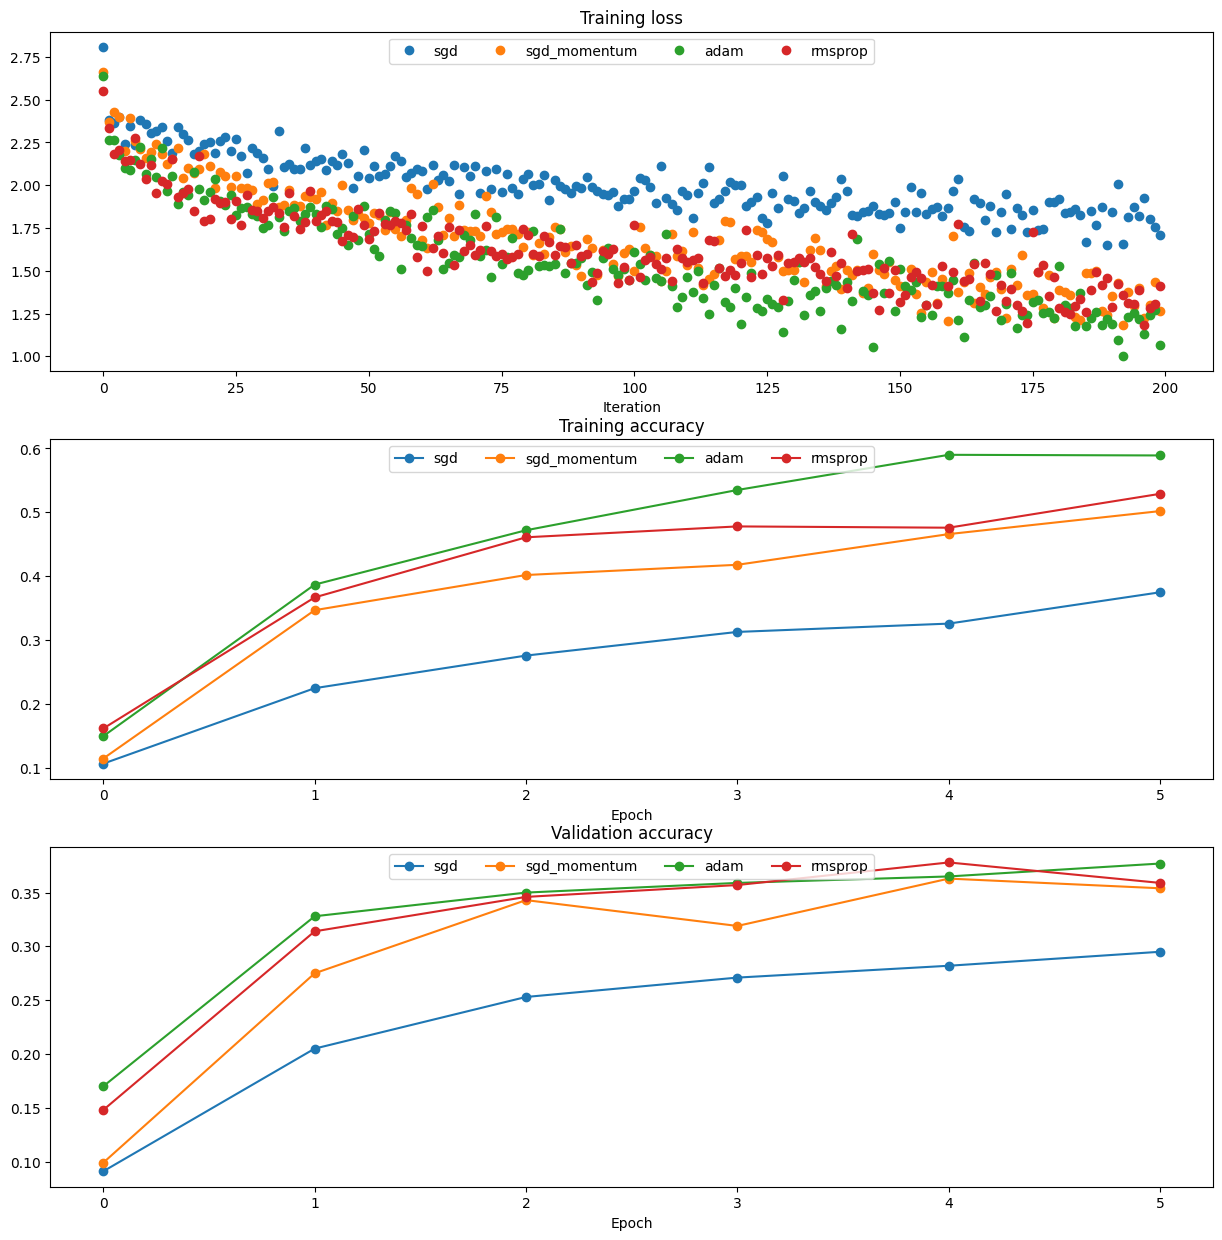

In [8]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Inline Question 1:

AdaGrad, like Adam, is a per-parameter optimization method that uses the following update rule:

```
cache += dw**2
w += - learning_rate * dw / (np.sqrt(cache) + eps)
```

John notices that when he was training a network with AdaGrad that the updates became very small, and that his network was learning slowly. Using your knowledge of the AdaGrad update rule, why do you think the updates would become very small? Would Adam have the same issue?


## Answer: 
The cache grows by dw^2 each iteration when using AdaGrad so the term 
dw/(np.sqrt(cache) + eps)
converges to 0 causing the model to learn slowly.
With Adam the update rule is 
next_w = w - lr * m_hat / (np.sqrt(v_hat) + eps)
where m_hat is a bias corrected moving average of the gredient
and v_hat is the bias corrected moving average of the squared gredient
that way v_hat doesn't grow as fast as cache grows in comparison to m_hat and dw respectively, and thus Adam won't have the same issue.


# Train a good model!
Train the best model that you can on CIFAR-10, storing your best model in the `best_model` variable. We require you to get at least 50% accuracy on the validation set using a fully-connected net or a cnn net.

You might find it useful to complete the `BatchNormalization.ipynb` and `Dropout.ipynb` notebooks before completing this part, since those techniques can help you train powerful models.

In [13]:
best_model = None
################################################################################
# TODO: Train the best FullyConnectedNet that you can on CIFAR-10. You might   #
# find batch/layer normalization and dropout useful. Store your best model in  #
# the best_model variable.                                                     #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

results = {}
best_val = -1

learning_rates = [0.002,0.0005]

dropout = [0.9]

#hidden_dims = {"d1":[256,256,512],"d2":[256,256,256],"d3":[512,256,256]}
hidden_dims = {"d1":[512,512,256,256]}#,"d2":[512,256,256]}#,"d3":[512,512,256,256]}
weight_scales = [2e-3]#,7e-2,3e-2]#

update_rules = ["sgd_momentum","adam"]

batch_sizes = [256]
for ws in weight_scales:
    for k, dims in hidden_dims.items():
        for lr in learning_rates:
            for rule in update_rules:
                for p in dropout:
                    results[(lr, rule, k,ws,p)] = 0
                    
                    
                    model = FullyConnectedNet(dims,
                        weight_scale=ws, dtype=np.float64,normalization="batchnorm",dropout=p)
                    solver = Solver(model, data,
                                    print_every=100, num_epochs=5, batch_size=batch_sizes[0],
                                    update_rule=rule,
                                    optim_config={
                                    'learning_rate': lr,
                                    }
                            )
                    solver.train()
                    
                    val_accuracy = solver.best_val_acc

                    results[(lr, rule, k,ws,p)] = val_accuracy
                    if(val_accuracy > best_val):
                        best_val = val_accuracy
                        best_model = model

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

(Iteration 1 / 955) loss: 2.301951
(Epoch 0 / 5) train acc: 0.123000; val_acc: 0.107000
(Iteration 101 / 955) loss: 1.700777
(Epoch 1 / 5) train acc: 0.481000; val_acc: 0.474000
(Iteration 201 / 955) loss: 1.673617
(Iteration 301 / 955) loss: 1.524338
(Epoch 2 / 5) train acc: 0.533000; val_acc: 0.518000
(Iteration 401 / 955) loss: 1.395461
(Iteration 501 / 955) loss: 1.208237
(Epoch 3 / 5) train acc: 0.563000; val_acc: 0.538000
(Iteration 601 / 955) loss: 1.262777
(Iteration 701 / 955) loss: 1.278937
(Epoch 4 / 5) train acc: 0.601000; val_acc: 0.548000
(Iteration 801 / 955) loss: 1.217020
(Iteration 901 / 955) loss: 1.214798
(Epoch 5 / 5) train acc: 0.631000; val_acc: 0.537000
(Iteration 1 / 955) loss: 2.301260
(Epoch 0 / 5) train acc: 0.086000; val_acc: 0.107000
(Iteration 101 / 955) loss: 1.596650
(Epoch 1 / 5) train acc: 0.486000; val_acc: 0.464000
(Iteration 201 / 955) loss: 1.557876
(Iteration 301 / 955) loss: 1.308337
(Epoch 2 / 5) train acc: 0.534000; val_acc: 0.507000
(Iteratio

# Test your model!
Run your best model on the validation and test sets. You should achieve above 50% accuracy on the validation set.

In [14]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.558
Test set accuracy:  0.535


In [15]:
results

{(0.002, 'sgd_momentum', 'd1', 0.002, 0.9): 0.548,
 (0.002, 'adam', 'd1', 0.002, 0.9): 0.555,
 (0.0005, 'sgd_momentum', 'd1', 0.002, 0.9): 0.558,
 (0.0005, 'adam', 'd1', 0.002, 0.9): 0.553}